In [2]:
import hashlib
import requests
import datetime
import pandas as pd

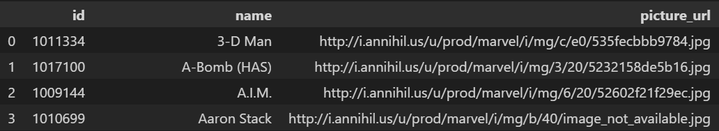

In [12]:
def hash_params(timestamp,priv_key,pub_key):
    """ Marvel API requires server side API calls to include
    md5 hash of timestamp + public key + private key """

    hash_md5 = hashlib.md5()
    hash_md5.update(f'{timestamp}{priv_key}{pub_key}'.encode('utf-8'))
    hashed_params = hash_md5.hexdigest()

    return hashed_params

In [13]:
timestamp = datetime.datetime.now().strftime('%Y-%m-%d%H:%M:%S')

pub_key = 'bde634fd1e0520e09d7f090abbf639b5'
priv_key = '028054bf19a6676286db07d674cf623245c661b1'

params = {'ts': timestamp, 
        'apikey': pub_key, 
        'hash': hash_params(timestamp,priv_key,pub_key),
        'nameStartsWith':"a",
        'offset':0,
        'limit': 84
        #'name':''
        };

url = 'http://gateway.marvel.com/v1/public/characters'

res = requests.get(url,params=params)
res.json()


{'code': 200,
 'status': 'Ok',
 'copyright': '© 2024 MARVEL',
 'attributionText': 'Data provided by Marvel. © 2024 MARVEL',
 'attributionHTML': '<a href="http://marvel.com">Data provided by Marvel. © 2024 MARVEL</a>',
 'etag': 'e3ae955b68ab929802ce6e6ea6d8049ea8188b56',
 'data': {'offset': 0,
  'limit': 84,
  'total': 84,
  'count': 84,
  'results': [{'id': 1017100,
    'name': 'A-Bomb (HAS)',
    'description': "Rick Jones has been Hulk's best bud since day one, but now he's more than a friend...he's a teammate! Transformed by a Gamma energy explosion, A-Bomb's thick, armored skin is just as strong and powerful as it is blue. And when he curls into action, he uses it like a giant bowling ball of destruction! ",
    'modified': '2013-09-18T15:54:04-0400',
    'thumbnail': {'path': 'http://i.annihil.us/u/prod/marvel/i/mg/3/20/5232158de5b16',
     'extension': 'jpg'},
    'resourceURI': 'http://gateway.marvel.com/v1/public/characters/1017100',
    'comics': {'available': 4,
     'collect

In [14]:

if res.status_code == 200:
    data = res.json()  
    
    characters = []
    for character in data["data"]["results"]:
        character_id = character["id"]
        name = character["name"]
        image_path = character["thumbnail"]["path"]
        image_extension = character["thumbnail"]["extension"]
        image_url = f"{image_path}.{image_extension}"
        
        characters.append({
            "ID": character_id,
            "Name": name,
            "Picture_URL": image_url
        })
    
    df = pd.DataFrame(characters)
    print(df)
    
    df.to_csv("marvel_characters_a.csv", index=False)
    print("Archivo CSV creado: marvel_characters_a.csv")
else:
    print(f"Error: {res.status_code} - {res.text}")


         ID                        Name  \
0   1017100                A-Bomb (HAS)   
1   1009144                      A.I.M.   
2   1010699                 Aaron Stack   
3   1009146  Abomination (Emil Blonsky)   
4   1016823      Abomination (Ultimate)   
..      ...                         ...   
79  1009163                      Aurora   
80  1009164                   Avalanche   
81  1009165                    Avengers   
82  1015239         Avengers (Ultimate)   
83  1011766             Azazel (Mutant)   

                                          Picture_URL  
0   http://i.annihil.us/u/prod/marvel/i/mg/3/20/52...  
1   http://i.annihil.us/u/prod/marvel/i/mg/6/20/52...  
2   http://i.annihil.us/u/prod/marvel/i/mg/b/40/im...  
3   http://i.annihil.us/u/prod/marvel/i/mg/9/50/4c...  
4   http://i.annihil.us/u/prod/marvel/i/mg/b/40/im...  
..                                                ...  
79  http://i.annihil.us/u/prod/marvel/i/mg/f/10/4c...  
80  http://i.annihil.us/u/prod/marv

In [10]:
pd.DataFrame(characters)

,ID,Name,Picture_URL
0,1017100,A-Bomb (HAS),http://i.annihil.us/u/prod/marvel/i/mg/3/20/52...
1,1009144,A.I.M.,http://i.annihil.us/u/prod/marvel/i/mg/6/20/52...
2,1010699,Aaron Stack,http://i.annihil.us/u/prod/marvel/i/mg/b/40/im...
3,1009146,Abomination (Emil Blonsky),http://i.annihil.us/u/prod/marvel/i/mg/9/50/4c...
4,1016823,Abomination (Ultimate),http://i.annihil.us/u/prod/marvel/i/mg/b/40/im...
5,1009148,Absorbing Man,http://i.annihil.us/u/prod/marvel/i/mg/1/b0/52...
6,1009149,Abyss,http://i.annihil.us/u/prod/marvel/i/mg/9/30/53...
7,1010903,Abyss (Age of Apocalypse),http://i.annihil.us/u/prod/marvel/i/mg/3/80/4c...
8,1011266,Adam Destine,http://i.annihil.us/u/prod/marvel/i/mg/b/40/im...
9,1010354,Adam Warlock,http://i.annihil.us/u/prod/marvel/i/mg/a/f0/52...


| Name         | Description           | Image_URL                                   |
|--------------|-----------------------|---------------------------------------------|
| A-Bomb (HAS) | Rick Jones is A-Bomb… | http://i.annihil.us/u/prod/marvel/A.jpg     |
| Abomination  | Emil Blonsky became…  | http://i.annihil.us/u/prod/marvel/B.jpg     |
